## 7. Diferenças finitas para EDPs elípticas

O método de diferenças finitas é uma abordagem numérica que aproxima as derivadas de uma equação diferencial parcial através de diferenças entre os valores discretos das variáveis ao longo de uma malha espacial e temporal, transformando a equação contínua em um sistema de equações algébricas solucionáveis. 

Uma equação diferencial parcial (EDP) elíptica é caracterizada por não depender explicitamente do tempo e estar associada a problemas estacionários. A forma geral de uma EDP elíptica em 2D é:

$$
A(x, y) u_{x x}+2 B(x, y) u_{x y}+C(x, y) u_{y y}+(\text { termos de ordem menor })=0
$$


com

$$
B^2-A C<0
$$

Exemplos clássicos de EDPs elípticas são:

**Equação de Laplace 2D:** Usada em problemas envolvendo potenciais elétricos, temperatura em regime estacionário, fluxo de fluidos incompressíveis, etc.

$$
\nabla^2 u=0 \quad \text { ou } \quad \frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=0
$$

**Equação de Poisson 2D:** Parecida com a de Laplace, mas com fonte interna $f(x, y)$. Usada, por exemplo, em problemas envolvendo distribuiçāo de carga elétrica.

$$
\nabla^2 u=f(x, y) \quad \text { ou } \quad \frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=f(x, y)
$$


**Equação de Helmholtz:** Forma estacionária da onda. Surge em problemas de acústica, vibraçōes estacionárias e óptica.

$$
\nabla^2 u+k^2 u=0
$$



**Equação de biharmônica:** Importante na teoria da elasticidade e deflexāo de placas finas.

$$
\nabla^4 u=0
$$



**Procedimento de resolução numérica por diferenças initas**

*Escolhendo a malha*

A primeira etapa para a resolução numérica pelo método das diferenças finitas é gerar uma malha discretizando a região $R$ do domínio do problema. No caso de uma região retangular $a<=x<=b$ e $c<=y<=d$, devemos escolher o número de subintervalos $m$ e $n$, nas direções $x$ e $y$, e obter os tamanhos dos passos em cada direção fazendo $h_x=(b-a) / n$ e $h_y=(d-c) / m$. Então dividimos o intervalo $[a,b]$ em $n$ partes iguais de largura $h$ e o intervalo $[c,d]$ em $m$ partes iguais de tamanho $k$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Exemplo 1:** Discretização de uma região retangular.

Considere a região $R=\{(x, y) \mid -1 \leq x \leq 3, -2 \leq y \leq 4 \}$ e dividida em $8$ subintervalos na direção $x$ e $10$ subintervalos na direção $y$. Então, o tamanho dos passos serão $h_x=0.5$ e $h_y=0.6$ nas direções $x$ e $y$ respectivamente. Obtenha as coodenadas dos pontos da malha retangular.

In [2]:
hx = 0.5
xi = np.arange(-1, 3+hx, hx)
print(xi)

[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


In [3]:
hy = 0.6
yi = np.arange(-2, 4+hy, hy)
print(yi)

[-2.  -1.4 -0.8 -0.2  0.4  1.   1.6  2.2  2.8  3.4  4. ]


In [4]:
x, y = np.meshgrid(xi,yi)
print(x)

[[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]]


In [5]:
print(y)

[[-2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2. ]
 [-1.4 -1.4 -1.4 -1.4 -1.4 -1.4 -1.4 -1.4 -1.4]
 [-0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8]
 [-0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2]
 [ 0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4]
 [ 1.   1.   1.   1.   1.   1.   1.   1.   1. ]
 [ 1.6  1.6  1.6  1.6  1.6  1.6  1.6  1.6  1.6]
 [ 2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2]
 [ 2.8  2.8  2.8  2.8  2.8  2.8  2.8  2.8  2.8]
 [ 3.4  3.4  3.4  3.4  3.4  3.4  3.4  3.4  3.4]
 [ 4.   4.   4.   4.   4.   4.   4.   4.   4. ]]


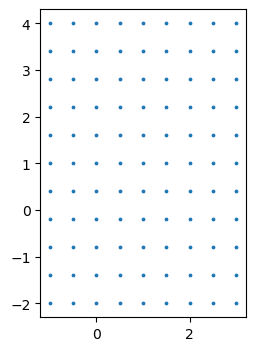

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(x,y, s = 3)
plt.gca().set_aspect('equal')

**Exemplo 2:** Discretização de um setor circular.

Considere um setor circular $R=\{(r, t) \mid 0 \leq r \leq 3, 0 \leq  \theta \leq \pi/2 \}$, em coordenadas polares, dividido em $15$ subintervalos na direção do raio $r$ e $18$ subintervalos na direção do ângulo $\theta$. 

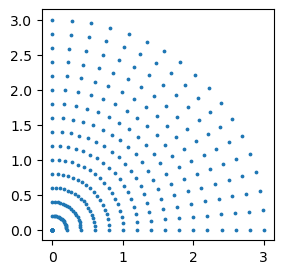

In [7]:
ri = np.linspace(0,3, 16)
ti = np.linspace(0, np.pi/2, 18)

# usando a função meshgrid
r, t = np.meshgrid(ri, ti)

plt.figure(figsize=(3, 3))
plt.scatter(r*np.cos(t), r*np.sin(t), s = 3)
plt.show()

*Obtendo as equações de diferenças finitas*

Usamos a série de Taylor na variável $x$ em torno de $x_i$ para gerar a fórmula de diferenças centradas

$$
\frac{\partial^2 u}{\partial x^2}\left(x_i, y_j\right) \approx
\frac{u\left(x_{i+1}, y_j\right)-2 u\left(x_i, y_j\right)+u\left(x_{i-1}, y_j\right)}{h_x^2}
$$

e na variável $y$ em torno de $y_j$ para gerar a fórmula 

$$
\frac{\partial^2 u}{\partial y^2}\left(x_i, y_j\right)
\approx
\frac{u\left(x_i, y_{j+1}\right)-2 u\left(x_i, y_j\right)+u\left(x_i, y_{j-1}\right)}{h_y^2}
$$


A utilização destas fórmulas nos permite expressar a EDO em termos de equações algébricas de diferenças, por exemplo, substituindo na na equação de Poisson 

$$\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=f$$


obtém-se para cada ponto $\left(x_i, y_j\right)$ da malha uma equação como

$$
\frac{u_{i-1,j}-2 u_{i,j}+u_{i+1,j}}{h_x^2}+
\frac{u_{i,j-1}-2 u_{i,j}+u_{i,j+1}}{h_y^2}
\approx
f_{i,j}
$$


em que $u_{i,j}=u(x_i, y_j)$ e $f_{i,j}= f(x_i, y_j)$, com $i=0,...,n$ e $j=0,...,m$ 


Note que, conhecidas as condições de contorno, ou seja os valores para $u(x_0,y_j)$, $u(x_n,y_j)$, $u(x_i,y_0)$ e $u(x_i,y_m)$, as equações para cada ponto interno da malha fornecem um sistema linear cuja solução é a resolução numérica do problema.

Note também que cada equação envolve o valor da função em um ponto interno da malha e os quatro pontos vizinhos a ele, em cima, em baixo, à direita e à esquerda.

<img src="https://github.com/tiagoburiol/MatComp_IV/blob/main/imagens/stenil.png?raw=true" width="280">

Assim, a forma matricial dos coeficientes é obtida usando as equações

$$
-2\left(\frac{1}{h_x^2}+\frac{1}{h_y^2}\right) u_{i, j}+\frac{1}{h_x^2}\left(u_{i-1, j}+u_{i+1, j}\right)+\frac{1}{h_y^2}\left(u_{i, j-1}+u_{i, j+1}\right)=f_{i,j}
$$


Em que o coeficiente central $u_{i, j}$ é

$$
A_{i, j}=-2\left(\frac{1}{h_x^2}+\frac{1}{h_y^2}\right)
$$

Os vizinhos em $x$ e $y$ são, respectivamente $\frac{1}{h_x^2}$ e $\frac{1}{h_y^2}$.

Usando condições de contorno nos pontos da fronteira da malha obtemos um sistema linear $(n-1)(m-1) \times(n-1)$ $(m-1)$ com as incógnitas sendo as aproximações para $u_{i, j}$ nos pontos interiores da malha.

Observe que no caso em que $h_x=h_y=h$ a equação fica

$$u_{i-1,j}+u_{i+1,j}-4u_{i,j}+ u_{i,j-1}+u_{i,j+1} = h^2 f_{i,j}$$

e, ainda, se $f_{i,j}=0$ (equação de Laplace), a equação fica 

$$u_{i-1,j}+u_{i+1,j}-4u_{i,j}+ u_{i,j-1}+u_{i,j+1} = 0.$$

A solução do sistema linear obtido a partir das equações de diferenças será a solução numérica da EDP sob as condições de contorno fornecidas. 

**Exemplo 3:** (Fonte: [Burden(2016](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/823))
Determine a distribuição de calor estacionária em uma placa de metal fina com dimensões $0,5 \mathrm{~m}$ por $0,5 \mathrm{~m}$ usando, inicialmente, $n=m=4$. Dois lados adjacentes são mantidos a $0^{\circ} \mathrm{C}$ e o calor nos outros lados aumenta linearmente de $0{ }^{\circ} \mathrm{C}$ em um canto a $100{ }^{\circ} \mathrm{C}$ onde os lados se encontram. Coloque os lados com condições de contorno nulas ao longo dos eixos $x$ e $y$.

*Solução:* Nesse caso o problema será expresso como

$$
\frac{\partial^2 u}{\partial x^2}(x, y)+\frac{\partial^2 u}{\partial y^2}(x, y)=0,
$$

para $(x, y)$ no conjunto $R=\{(x, y) \mid 0<x<0,5,0<y<0,5\}$, com as condições de contorno

$$
u(0, y)=0, u(x, 0)=0, u(x, 0,5)=200 x \text { e } u(0,5, y)=200 y .
$$

Se $n=m=4$  a equação diferença  é

$$u_{i-1,j}+u_{i+1,j}-4u_{i,j}+ u_{i,j-1}+u_{i,j+1} = 0$$

para cada $i=1,2,3$ e $j=1,2,3$.

É conveniente numerarmos os pontos internos da grade como é mostrado na figura abaixo para reduzir a necessidade de subíndice duplo

<img src="https://github.com/tiagoburiol/MatComp_IV/blob/main/imagens/numeracao.png?raw=true" width="380">

Expressar isto em termos dos pontos interiores da grade, com a enumeração descrita acima, $u_i=u\left(P_i\right)$, implica que as equações nos pontos $P_i$ serão:
$$
\begin{array}{rrrl}
P_1: & 4 u_1-u_2-u_4 & =u_{0,3}+u_{1,4}, \\
P_2: & 4 u_2-u_3-u_1-u_5 & =u_{2,4}, \\
P_3: & 4 u_3-u_2-u_6 & =u_{4,3}+u_{3,4}, \\
P_4: & 4 u_4-u_5-u_1-u_7 & =u_{0,2}, \\
P_5: & 4 u_5-u_6-u_4-u_2-u_8 & =0, \\
P_6: & 4 u_6-u_5-u_3-u_9 & =u_{4,2}, \\
P_7: & 4 u_7-u_8-u_4 & =u_{0,1}+u_{1,0}, \\
P_8: & 4 u_8-u_9-u_7-u_5 & =u_{2,0}, \\
P_9: & 4 u_9-u_8-u_6 & =u_{3,0}+u_{4,1},
\end{array}
$$

em que os lados direitos das equações são obtidos a partir das condições de contorno.
De fato, as condições de contorno implicam que

$$
\begin{aligned}
& u_{1,0}=u_{2,0}=u_{3,0}=u_{0,1}=u_{0,2}=u_{0,3}=0, \\
& u_{1,4}=u_{4,1}=25, \quad u_{2,4}=u_{4,2}=50 \quad\text{e}\quad u_{3,4}=u_{4,3}=75 .
\end{aligned}
$$

In [347]:
A = np.array([[4 , -1 , 0 , -1 , 0 , 0 , 0 , 0 , 0],
              [-1 , 4 , -1 , 0 , -1 , 0 , 0 , 0 , 0],
              [0 , -1 , 4 , 0 , 0 , -1 , 0 , 0 , 0],
              [-1 , 0 , 0 , 4 , -1 , 0 , -1 , 0 , 0],
              [0 , -1 , 0 , -1 , 4 , -1 , 0 , -1 , 0],
              [0 , 0 , -1 , 0 , -1 , 4 , 0 , 0 , -1],
              [0 , 0 , 0 , -1 , 0 , 0 , 4 , -1 , 0],
              [0 , 0 , 0 , 0 , -1 , 0 , -1 , 4 , -1],
              [0 , 0 , 0 , 0 , 0 , -1 , 0 , -1 , 4]])
b = np.array([25,50,150,0,0,50,0,0,25])

In [348]:
S = np.linalg.solve(A,b)
print (S)

[18.75 37.5  56.25 12.5  25.   37.5   6.25 12.5  18.75]


In [349]:
S = S.reshape(3,3)
print (S)

[[18.75 37.5  56.25]
 [12.5  25.   37.5 ]
 [ 6.25 12.5  18.75]]


In [350]:
T = np.zeros((5,5))
T[:,-1] = np.array([100,75,50,25,0])
T[0] = np.array([0,25,50,75,100])
T[1:-1, 1:-1] = S
print (T)

[[  0.    25.    50.    75.   100.  ]
 [  0.    18.75  37.5   56.25  75.  ]
 [  0.    12.5   25.    37.5   50.  ]
 [  0.     6.25  12.5   18.75  25.  ]
 [  0.     0.     0.     0.     0.  ]]


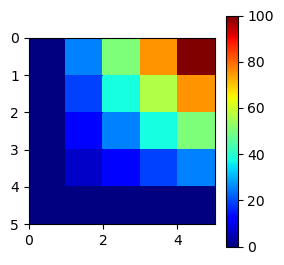

In [351]:
fig, ax = plt.subplots(figsize=(3, 3))
plt.pcolor(T, cmap='jet')
plt.colorbar()
ax.invert_yaxis()
ax.set_aspect('equal')
plt.show()

**Algoritmo parametrizado:** 
A seguir é mostrado um exemplo de algoritmo parametrizado para montar o sistema linear de equações de diferenças e resolução desse exemplo com diferentes configurações de malhas inclusive para $h_x \neq h_y$.

In [604]:
Lx= 0.5
Ly= 0.5
nx= 30
ny= 20

In [605]:
hx = Lx/nx
hy = Ly/ny

N = (nx-1) * (ny-1)
A = np.zeros((N, N), dtype=float)
b = np.zeros(N, dtype=float)

In [606]:
def idx(i, j):
    return (i-1)*(ny-1) + (j-1)

In [607]:
# Montagem do sistema
ax = (1/hx**2)
ay = 1.0 / hy**2
ac = -2.0 * (ax + ay)

for i in range(1, nx):        # i = 1 .. nx-1 (internos em x)
    for j in range(1, ny):    # j = 1 .. ny-1 (internos em y)
        k = idx(i, j)
        A[k, k] = ac

        if i > 1:
            A[k, idx(i-1, j)] = (1/hx**2)
        else:
            b[k] -= ax * 0.0

        if i < nx-1:
            A[k, idx(i+1, j)] = ax
        else:
            b[k] -= ax * (200.0 * (j * hy))

        # vizinho abaixo (i, j-1)
        if j > 1:
            A[k, idx(i, j-1)] = ay
        else:
            b[k] -= ay * 0.0

        if j < ny-1:
            A[k, idx(i, j+1)] = ay
        else:
            b[k] -= ay * (200.0 * (i * hx))


In [608]:
# Resolve o sistema
u_vec = np.linalg.solve(A, b)
U_internal = u_vec.reshape((nx-1, ny-1))  # shape (nx-1, ny-1)

# Reconstrução da matriz completa (inclui bordas)
U = np.zeros((nx+1, ny+1), dtype=float)
x_coords = np.linspace(0.0, Lx, nx+1)
y_coords = np.linspace(0.0, Ly, ny+1)

# borda superior: u(x,Ly) = 200*x
for i in range(nx+1):
    U[i, ny] = 200.0 * x_coords[i]
# borda direita: u(Lx,y) = 200*y
for j in range(ny+1):
    U[nx, j] = 200.0 * y_coords[j]

# internos
U[1:nx, 1:ny] = U_internal

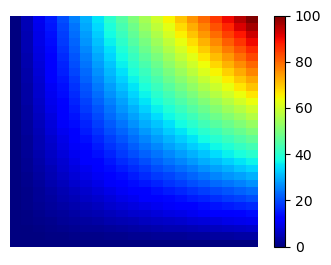

In [611]:
fig, ax = plt.subplots(figsize=(4, 3))
p = ax.pcolor(U, cmap='jet')
fig.colorbar(p,ax=ax)
ax.axis('off')
plt.show()

##### **Exercício 1.** Determine uma solução aproximada da equação diferencial parcial elíptica
$$
\begin{array}{cl}
\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=0, & 1<x<2, \quad 0<y<1 ; \\
u(x, 0)=2 \ln x, & u(x, 1)=\ln \left(x^2+1\right), \quad 1 \leq x \leq 2 ; \\
u(1, y)=\ln \left(y^2+1\right), & u(2, y)=\ln \left(y^2+4\right), \quad 0 \leq y \leq 1 .
\end{array}
$$

Use $h=k=\frac{1}{3}$ e compare os resultados com a solução real $u(x, y)=\ln \left(x^2+y^2\right)$.

### Resolução iterativa de Gauss-Seidel (ou Liebmann)

À medida que o tamanho da malha estudada aumenta, as dimensões do sistema associado aumenta <u>quadraticamente</u> (para uma malha $n\times n$ obtemos um sistema $(n-2)\times(n-2)$). Assim, resolver diretamente o sistema pode se tornar pouco eficiente.

Em vista disso, vejamos como utilizar um método iterativo. No contexto de problemas de condução térmica (como o anterior, da equação de Laplace), o método pode ser interpretado como **inicializando uma região plana em temperatura zero e vendo como a condução do calor obtida pelo método das diferenças finitas reagem às condições de fronteira dadas**.

Por exemplo, aplicando o método das diferenças finitas à equação de Laplace $\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2 = 0}$ obtemos

$$
T_{i-1,j} + T_{i+1,j} - 4T_{i,j} + T_{i,j-1} + T_{i,j+1} = 0,
$$

que pode ser reescrita como

$$
T_{i,j} = \frac{T_{i-1,j} + T_{i+1,j} + T_{i,j-1} + T_{i,j+1}}{4}.
$$

Assim, vejamos como computar os valores da malha após 100 iterações para o mesmo problema do Exemplo 3,

In [630]:
nx, ny = 12, 12
# Reconstrói a solução completa (nx+1, ny+1)
T = np.zeros((nx+1, ny+1), dtype=float)

# bordas: esquerda (x=0) e baixo (y=0) -> zero por enunciado
# borda superior y = Ly: u(x,Ly) = 200 * x
x_coords = np.linspace(0.0, Lx, nx+1)
y_coords = np.linspace(0.0, Ly, ny+1)
for i in range(nx+1):
    T[i, ny] = 200.0 * x_coords[i]
# borda direita x = Lx: u(Lx,y) = 200 * y
for j in range(ny+1):
    T[nx, j] = 200.0 * y_coords[j]

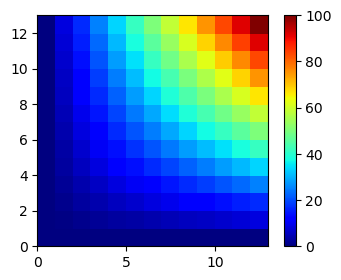

In [631]:
# rodando a fórmula de diferenças finitas 100 vezes
for _ in range(100):
    for i in range(1, len(T)-1):
        for j in range(1, len(T)-1):
            T[i, j] = (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1]) / 4

# plotando (exceto as fronteiras)
fig, ax = plt.subplots(figsize=(4, 3))
plt.pcolor(T, cmap='jet')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

<br>

Para decidir quantas iterações rodar, vamos definir um **critério de parada** através da diferença relativa entre a temperatura na malha $T$ numa iteração e a temperatura na iteração anterior $T_{ant}$,

$$err_{rel} = \frac{|| T-T_{ant} ||}{||T||} .$$

A norma $||T||$ pode ser calculada com o comando `np.linalg.norm(T)`.

Assim, iteramos o método até que esse erro relativo fique menor que uma tolerância pré-estabelecida.

**Exemplo 4:** Considere uma placa aquecida na qual as temperaturas nas bordas são mantidas em níveis constantes (condição de contorno de Dirichlet) como é mostrado na figura abaixo (Fonte: [Chapra, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/769)). 

<img src="https://github.com/tiagoburiol/MatComp_IV/blob/main/imagens/exemplo_laplace.png?raw=true" width="240">


Número de iterações: 15


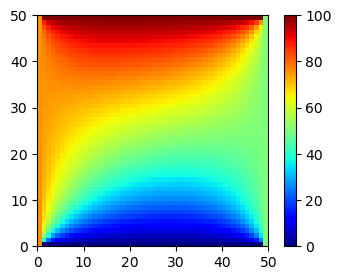

In [632]:
# reinicializando a temperatura na malha com zeros
T = np.zeros([50, 50])

# inicializando a temperatura anterior
T_ant = T.copy()

# condições de fronteira
T[0, :] = 0    # fronteira inferior
T[49, :] = 100     # frontreira superior
T[:, 0] = 75      # fronteira esquerda
T[:, 49] = 50    # fronteira direita

# inicializando o erro relativo num valor alto
err = 1
# definindo a tolerância
tol = 0.001
# contador de iterações
n_iter = 0
error = []
# escreva um laço 'while' que resulte num erro relativo entre T e T_ant menor
# que a tolerância definida, contando o número de iterações
while err > tol:
  n_iter += 1
  for _ in range(100):
    for i in range(1, len(T)-1):
        for j in range(1, len(T)-1):
            T[i, j] = (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1]) / 4
  err = np.linalg.norm(T-T_ant)/np.linalg.norm(T)
  error.append(err)
  T_ant = T.copy()

print('Número de iterações:', n_iter)

# plotando (exceto as fronteiras)
fig, ax = plt.subplots(figsize=(4, 3))
plt.pcolor(T, cmap='jet')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

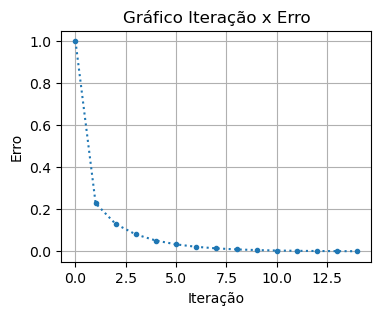

In [633]:
fig, ax = plt.subplots(figsize=(4, 3))
plt.plot(range(len(error)),error, '.:')
plt.grid()

plt.title('Gráfico Iteração x Erro')
plt.ylabel('Erro')
plt.xlabel('Iteração')

plt.show()

Além disso, em contraste com o método de resolução direto, no método iterativo de Gauss-Seidel **é bastante simples aumentar o tamanho da malha** e, consequentemente, melhorar a aproximação da solução.

In [634]:
import matplotlib.pyplot as plt
import numpy as np

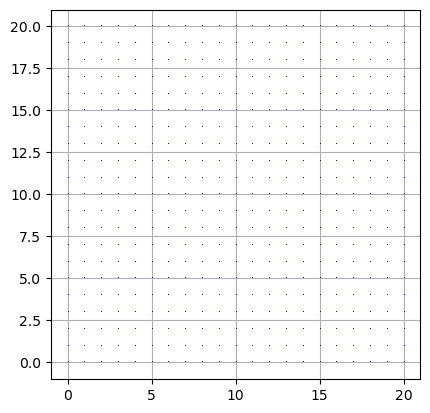

In [470]:
x = np.linspace(0,20,21)
y = np.linspace(0,20,21)
xi, yj = np.meshgrid(x,y)

plt.plot(xi,yj,'b,')
plt.gca().set_aspect('equal')
plt.grid()

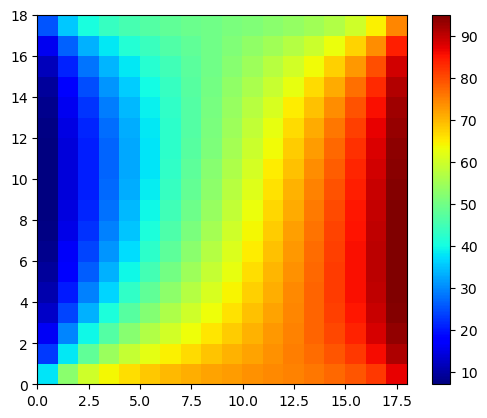

In [471]:
ni = 20
nj = 20

T = np.zeros([ni,nj])
T_ant = T.copy()
T[-1, :] = 50   # em cima
T[:, -1] = 100  # direita
T[0,  :] = 75   # embaixo
T[:,  0] = 0    # esquerda

err = 1000
n = 0
err_plot = []
int_plot = []

#print(T)
while err>0.0001:
    n=n+1
    int_plot.append(n)
    for i in range(1,len(T)-1):
        for j in range(1,len(T)-1):
            T[i,j] = (T[i-1,j]+T[i+1,j]+T[i,j-1]+T[i,j+1])/4
    err = np.linalg.norm(T-T_ant)/np.linalg.norm(T)
    T_ant = T.copy()
    
#plot
plt.pcolor(T[1:-1,1:-1],cmap='jet')
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

Vamos agora propor a resolução dos mesmos exercícios do Notebook 05, mas usando o método iterativo.

**Exercício 2:** Determinar uma solução aproximada da equação diferencial parcial elíptica
$$
\begin{aligned}
& \frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=4, \quad 0<x<1, \quad 0<y<2 ; \\
& u(x, 0)=x^2, \quad u(x, 2)=(x-2)^2, \quad 0 \leq x \leq 1 ; \\
& u(0, y)=y^2, \quad u(1, y)=(y-1)^2, \quad 0 \leq y \leq 2 . \\
&
\end{aligned}
$$
Use $h=k=\frac{1}{2}$ e compare os resultados com a solução real $u(x, y)=(x-y)^2$.

**Exercício 3:** Determinar uma solução aproximada da equação diferencial parcial elíptica
$$
\begin{aligned}
& \frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=0, \quad 1<x<2, \quad 0<y<1 ; \\
& u(x, 0)=2 \ln x, \quad u(x, 1)=\ln \left(x^2+1\right), \quad 1 \leq x \leq 2 ; \\
& u(1, y)=\ln \left(y^2+1\right), \quad u(2, y)=\ln \left(y^2+4\right), \quad 0 \leq y \leq 1 . \\
&
\end{aligned}
$$
Use $h=k=\frac{1}{3}$ e compare os resultados com a solução real $u(x, y)=\ln \left(x^2+y^2\right)$.

**Exercício 4: Diferenças Finitas na Equação de Poisson** (contribuição de [JonathanWNogueira](https://github.com/JonathanWNogueira/burden_numerical_analysis))

Use o código disponível nesse [link](https://github.com/JonathanWNogueira/burden_numerical_analysis/blob/main/12.ipynb), o qual foi desenvolvido com base no algorítmo em [Burden e Faires (2016, p. 809)](https://app.minhabiblioteca.com.br/reader/books/9788522123414/pageid/825) para resolver o seguinte problema:

Use o método de Poisson de diferenças finitas $\operatorname{com} n=6, m=5$, e tolerância de $10^{-10}$ para obter uma aproximação da solução de

$$
\frac{\partial^2 u}{\partial x^2}(x, y)+\frac{\partial^2 u}{\partial y^2}(x, y)=x e^y, \quad 0<x<2, \quad 0<y<1,
$$

com as condições de contorno

$$
\begin{aligned}
& u(0, y)=0, u(2, y)=2 e^y, 0 \leq y \leq 1, \\
& u(x, 0)=x, u(x, 1)=e x, 0 \leq x \leq 2
\end{aligned}
$$

e compare os resultados com a solução exata $u(x, y)=x e^y$.

Em seguida, use-o para resolver os demais exercícios.

**Exercício 5:** ([Burden e Faires, 2016](https://app.minhabiblioteca.com.br/reader/books/9788522123414/pageid/829)) Resolva numericamente o seguinte problema 

$$
\begin{gathered}
\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=-(\cos (x+y)+\cos (x-y)), \quad 0<x<\pi, \quad 0<y<\frac{\pi}{2} \\
u(0, y)=\cos y, \quad u(\pi, y)=-\cos y, \quad 0 \leq y \leq \frac{\pi}{2} \\
u(x, 0)=\cos x, \quad u\left(x, \frac{\pi}{2}\right)=0, \quad 0 \leq x \leq \pi
\end{gathered}
$$

Então, compare os resultados com a solução real $u(x, y)=\cos x \cos y$.



**Exercício 6:**  ([Burden e Faires, 2016](https://app.minhabiblioteca.com.br/reader/books/9788522123414/pageid/829))  Resolva numericamente o seguinte problema 
$$
\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=\left(x^2+y^2\right) e^{x y}, \quad 0<x<2,0<y<1
$$


$$
\begin{array}{lll}
u(0, y)=1, & u(2, y)=e^{2 y}, & 0 \leq y \leq 1 ; \\
u(x, 0)=1, & u(x, 1)=e^x, & 0 \leq y \leq 2 .
\end{array}
$$


Então, compare os resultados com a solução real $u(x, y)=e^{r y}$.

**Exercício 7:** Resolva numericamente o seguinte problema 
$$
\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=\frac{x}{y}+\frac{y}{x}, \quad 1<x<2, \quad 1<y<2
$$

$$
\begin{array}{lll}
u(x, 1)=x \ln x, & u(x, 2)=x \ln \left(4 x^2\right), & 1 \leq x \leq 2 \\
u(1, y)=y \ln y, & u(2, y)=2 y \ln (2 y), & 1 \leq y \leq 2
\end{array}
$$


Então, compare os resultados com a solução real $u(x, y)=x y \ln x y$.

**Exercício 7:**  ([Burden e Faires, 2016](https://app.minhabiblioteca.com.br/reader/books/9788522123414/pageid/829))  Resolva numericamente o seguinte problema 
$$
\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=\frac{x}{y}+\frac{y}{x}, \quad 1<x<2, \quad 1<y<2
$$

$$
\begin{array}{lll}
u(x, 1)=x \ln x, & u(x, 2)=x \ln \left(4 x^2\right), & 1 \leq x \leq 2 \\
u(1, y)=y \ln y, & u(2, y)=2 y \ln (2 y), & 1 \leq y \leq 2
\end{array}
$$


Então, compare os resultados com a solução real $u(x, y)=x y \ln x y$.

**Referências**

BOYCE, William E.; DIPRIMA, Richard C.; MEADE, Douglas B. Equacoes Diferenciais Elementares e Problemas de Valores de Contorno. 12. ed. Rio de Janeiro: LTC, 2024. E-book. p.e-11. ISBN 9788521638841.

BURDEN, Richard L.; FAIRES, J D.; BURDEN, Annette M. Análise Numérica - Tradução da 10ª edição norte-americana. 3. ed. Porto Alegre: +A Educação - Cengage Learning Brasil, 2016. E-book. p.812. ISBN 9788522123414.

CHAPRA, Steven C.; CANALE, Raymond P. Métodos numéricos para engenharia. 7. ed. Porto Alegre: AMGH, 2016. E-book. p.781. ISBN 9788580555691. 